In [1]:
import numpy as np
from scipy.signal import butter, filtfilt
import pickle

In [2]:
"Figure 7. Table 1."

'Figure 7. Table 1.'

In [3]:
from matplotlib import font_manager
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

fontPath = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman_Italic.ttf'
fontProp = font_manager.FontProperties(fname = fontPath)

font_manager.fontManager.addfont(fontPath)
mpl.rcParams['font.family'] = fontProp.get_name()

In [4]:
numberChannels = 12
numberGestures = 10
trialsPerGesture = 36
numberSubjects = 91

In [5]:
collateData = []
Frequency = []

for subjectNumber in range(1, 100):
    if subjectNumber not in [5, 11, 14, 17, 18, 35, 38, 41]:
        name = "../formattedData/" + str(subjectNumber) + ".pkl"
        with open(name, "rb") as file:
            loadedData = pickle.load(file)

        Features = loadedData["EMG"]
        normalizedFeatures = Features
        Labels = loadedData["Labels"]
        samples = 2 * loadedData["Frequency"]

        Indices =  {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}
        for i in range(len(Labels)):
            Indices[Labels[i]].append(i)

        gesturesLabels = np.zeros((numberGestures, trialsPerGesture, numberChannels, 4000))
        for i in range(numberGestures):
            for j in range(trialsPerGesture):
                gesturesLabels[i, j] = normalizedFeatures[Indices[i][j], :, :4000]
        
        collateData.append(gesturesLabels)
        Frequency.append(loadedData["Frequency"])

In [6]:
collateData = np.array(collateData)
Frequency = np.array(Frequency)

print(collateData.shape)
print(Frequency.shape)

(91, 10, 36, 12, 4000)
(91,)


In [7]:
def butterworthBandpass(lowcut, highcut, fs, order = 3):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype = 'band')
    return b, a

def applyBandpassFilter(data, lowcut, highcut, fs, order = 3):
    b, a = butterworthBandpass(lowcut, highcut, fs, order = order)
    filteredData = filtfilt(b, a, data, axis = -1)
    return filteredData

In [8]:
frequencies = list(range(20, 450, 30))
print(frequencies)

[20, 50, 80, 110, 140, 170, 200, 230, 260, 290, 320, 350, 380, 410, 440]


In [10]:
meanPower = np.zeros((len(frequencies) - 1, numberSubjects))

for i in range(len(frequencies) - 1):
    print(i)
    for j in range(numberSubjects):
        filteredData = np.square(applyBandpassFilter(collateData[j], frequencies[i], frequencies[i + 1], Frequency[j]))
        meanPower[i, j] = np.mean(filteredData, axis = (0, 1, 2, 3))

0
1
2
3
4
5
6
7
8
9
10
11
12
13


In [11]:
print(meanPower.shape)

(14, 91)


In [12]:
totalMean = np.mean(meanPower, axis = 1)

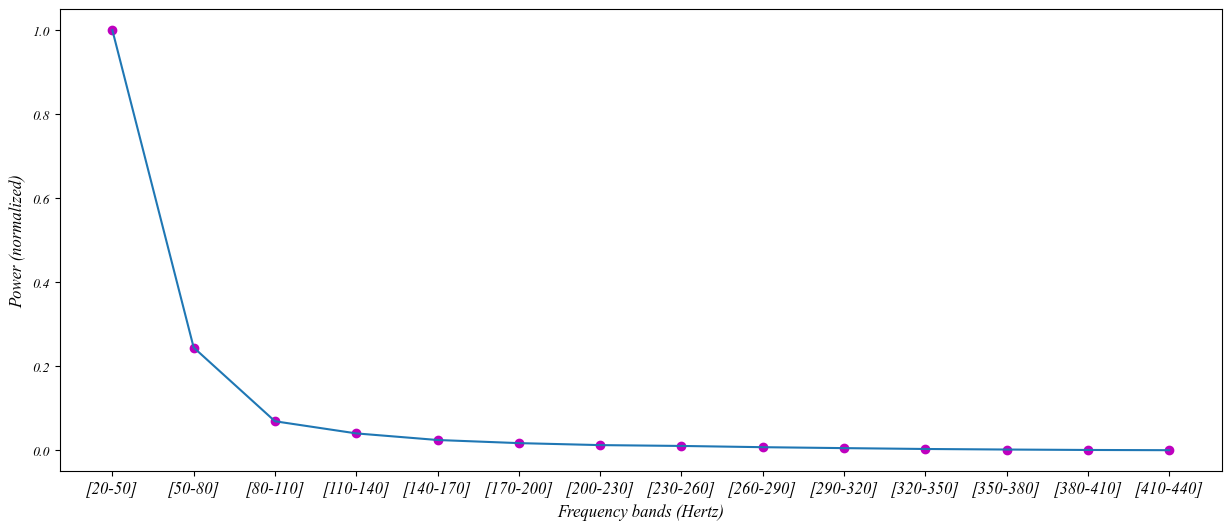

In [19]:
plt.figure(figsize = (15, 6))

plt.plot(frequencies[1:], (totalMean - min(totalMean))/(max(totalMean) - min(totalMean)))
plt.scatter(frequencies[1:], (totalMean - min(totalMean))/(max(totalMean) - min(totalMean)), color = 'm')

plt.xlabel('Frequency bands (Hertz)', fontproperties = fontProp, fontsize = 12)
plt.ylabel('Power (normalized)', fontproperties = fontProp, fontsize = 12)


tickPositions = [50, 80, 110, 140, 170, 200, 230, 260, 290, 320, 350, 380, 410, 440]
tickLabels = ["[20-50]", "[50-80]", "[80-110]", "[110-140]", "[140-170]", "[170-200]", "[200-230]", "[230-260]", "[260-290]", "[290-320]", "[320-350]", "[350-380]", "[380-410]", "[410-440]"]

plt.xticks(tickPositions, tickLabels, fontsize = 12)

plt.savefig("spectralPower.eps", format = "eps")
plt.show()
plt.close()

In [9]:
frequencies = [20, 50, 110, 230, 450]
print(frequencies)

[20, 50, 110, 230, 450]


In [10]:
filteredData = np.zeros((4, 91, 10, 36, 12, 4000))

for i in range(len(frequencies) - 1):
    for j in range(numberSubjects):
        filteredData[i, j] = (applyBandpassFilter(collateData[j, :, :, :, :], frequencies[i], frequencies[i + 1], Frequency[j]))

In [11]:
power = np.square(filteredData)

In [12]:
meanPower = np.mean(power, axis = (2, 3, 4, 5))

In [13]:
totalMean = np.mean(meanPower, axis = 1)

In [14]:
print(totalMean/np.sum(totalMean))

[0.68259568 0.21472322 0.07091542 0.03176568]
